In [11]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

Read all patients at once

In [2]:
dataframe = pd.DataFrame()
for i in range(0,70):
    df = pd.read_csv('data/Diabetes-Data/data-01', 
                   names=['Date','Time','Code','Value'],
                   sep='\t', header=None)
    df['patient_id'] = (i+1)
    dataframe = dataframe.append(df)

In [3]:
dataframe.sample(5)

,Date,Time,Code,Value,patient_id
303,06-04-1991,18:00,33,7,5
158,05-14-1991,7:36,33,9,27
377,06-13-1991,17:10,62,180,61
91,05-04-1991,6:50,58,133,7
769,08-06-1991,8:22,58,101,26


The Code field is deciphered as follows:

- 33 = Regular insulin dose
- 34 = NPH insulin dose
- 35 = UltraLente insulin dose
- 48 = Unspecified blood glucose measurement
- 57 = Unspecified blood glucose measurement
- 58 = Pre-breakfast blood glucose measurement
- 59 = Post-breakfast blood glucose measurement
- 60 = Pre-lunch blood glucose measurement
- 61 = Post-lunch blood glucose measurement
- 62 = Pre-supper blood glucose measurement
- 63 = Post-supper blood glucose measurement
- 64 = Pre-snack blood glucose measurement
- 65 = Hypoglycemic symptoms
- 66 = Typical meal ingestion
- 67 = More-than-usual meal ingestion
- 68 = Less-than-usual meal ingestion
- 69 = Typical exercise activity
- 70 = More-than-usual exercise activity
- 71 = Less-than-usual exercise activity
- 72 = Unspecified special event

In [4]:
REGULAR_INSULIN_DOSE_CD = 33
NPH_INSULIN_DOSE_CD = 34
ULTRALENTE_INSULIN_DOSE_CD = 35

PRE_BRKFAST_BG_CD = 58
POST_BRKFAST_BG_CD = 59

PRE_LUNCH_BG_CD = 60
POST_LUNCH_BG_CD = 61

PRE_SUPPER_BG_CD = 62
POST_SUPPER_BG_CD = 63

PRE_SNACK_BG_CD = 64


In [5]:
dataframe['TimeStamp'] = pd.to_datetime(dataframe['Date'] + ' ' + dataframe['Time'])

Let's see how has been the Regular Insulin dosage on Patient 1

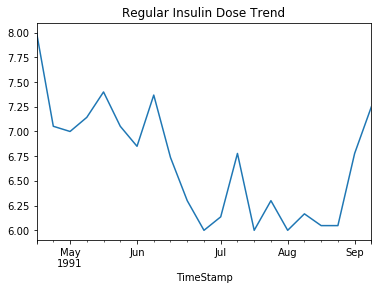

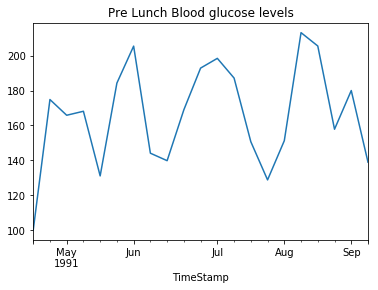

In [29]:
dataframe[(dataframe['patient_id']==1) & 
          (dataframe['Code']==REGULAR_INSULIN_DOSE_CD)].set_index('TimeStamp')['Value'].resample('W').mean().\
            plot(title='Regular Insulin Dose Trend')

plt.show()

dataframe[(dataframe['patient_id']==1) & 
          (dataframe['Code']==PRE_BRKFAST_BG_CD)].set_index('TimeStamp')['Value'].resample('W').mean().\
            plot(title='Pre Lunch Blood glucose levels')


plt.show()

In [30]:
dataframe[dataframe['Code']==POST_BRKFAST_BG_CD]['Value']

Series([], Name: Value, dtype: int64)